In [111]:
import pandas as pd
import numpy as np
import pandas_datareader as dr
import datetime as dt
import matplotlib.pyplot as plt
from random import random

In [159]:
companies = ['goog','mo','dal','axp','APD','aa']
start = datetime(2016, 1, 1)
end = datetime(2019, 5, 1)
df = dr.data.get_data_yahoo(companies, start, end, interval='m')
data = df[['Adj Close']]
log_data = np.log(data)
df = log_data['Adj Close'].diff()
ndata = 100*df
ndata = ndata.dropna()

In [161]:
mean_ret = df.mean()
std_dev = df.std()
covarmat = df.cov()
corrmat = df.corr()
row,col = df.shape

In [187]:
portfolios = []
portweights = []
portreturn = []
portstd = []
portsharpe = []
nports = 40000
for i in range(0, nports):
    w = [random() for i in range(0,len(companies))]
    #w = [random()]*(len(companies))
    s = sum(w)
    weight = [ i/s for i in w ]
    portweights.append(weight)
    
for j in range(0, nports):
    portfolio_ret = np.dot(portweights[j], mean_ret)
    portreturn.append(portfolio_ret)
    variance = np.dot(np.transpose(portweights[j]), np.dot(covarmat, portweights[j]))
    stdev = np.sqrt(variance)
    portstd.append(stdev)
    sharperatio = portfolio_ret/stdev
    portsharpe.append(sharperatio)

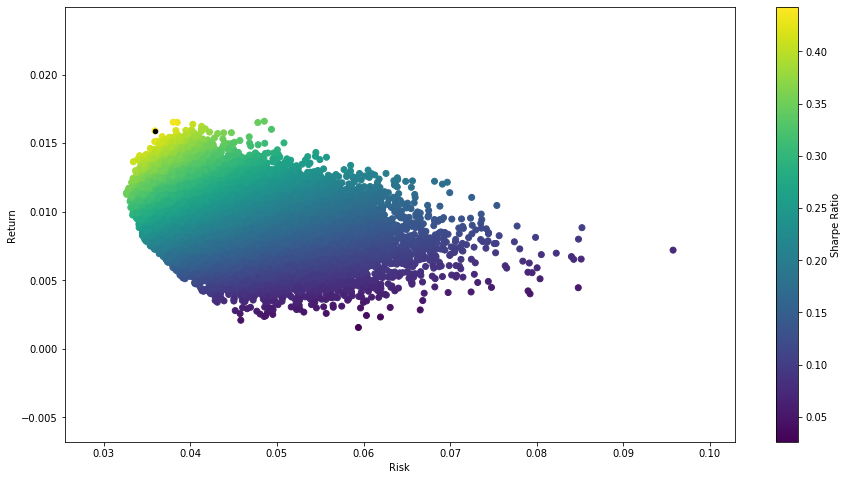

The Optimal weights are:
[0.4636164283149712, 0.008919673154586588, 0.40154981763453546, 0.0012990200975871932, 0.029927503544602028, 0.09468755725371751]


In [190]:
plt.figure(figsize = (15,8))
plt.scatter(portstd, portreturn, c=portsharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
opt = np.argmax(portsharpe)
plt.scatter(portstd[opt], portreturn[opt], c='black', s=20)
plt.show()

In [191]:
print('The Optimal weights are:')
print(portweights[opt])

The Optimal weights are:
[0.4636164283149712, 0.008919673154586588, 0.40154981763453546, 0.0012990200975871932, 0.029927503544602028, 0.09468755725371751]
